# Lab 1 - API de Acesso a Dados

# Tarefa 1

Das fontes de dados disponíveis, tente encontrar fontes com formatos diferentes e importá-las via Python. Busque pelo menos dois formatos.

In [15]:
import pandas as pd
import io
import json
import urllib
import requests

In [16]:
#Covid Current US Data (CSV)

In [17]:
url_tab = "https://api.covidtracking.com/v1/us/current.csv"

In [18]:
header = {
    'authority': 'www.redfin.com',
    'dnt': '1',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (X11; CrOS x86_64 13729.41.0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.76 Safari/537.36',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'sec-fetch-site': 'none',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-user': '?1',
    'sec-fetch-dest': 'document',
    'accept-language': 'en-US,en;q=0.9',
    'cookie': 'RF_BROWSER_ID=k90lBkClQXStk8cYYsmZnA; RF_BID_UPDATED=1; RF_CORVAIR_LAST_VERSION=356.4.0; RF_BROWSER_CAPABILITIES=%7B%22screen-size%22%3A4%2C%22ie-browser%22%3Afalse%2C%22events-touch%22%3Afalse%2C%22ios-app-store%22%3Afalse%2C%22google-play-store%22%3Afalse%2C%22ios-web-view%22%3Afalse%2C%22android-web-view%22%3Afalse%7D; G_ENABLED_IDPS=google; RF_VISITED=true; AKA_A2=A; unifiedLastSearch=name%3DNew%2520York%26subName%3DNew%2520York%252C%2520NY%252C%2520USA%26url%3D%252Fcity%252F30749%252FNY%252FNew-York%26id%3D2_30749%26type%3D2%26unifiedSearchType%3D2%26isSavedSearch%3D%26countryCode%3DUS; RF_LAST_NAV=0; userPreferences=parcels%3Dtrue%26schools%3Dfalse%26mapStyle%3Ds%26statistics%3Dtrue%26agcTooltip%3Dfalse%26agentReset%3Dfalse%26ldpRegister%3Dfalse%26afCard%3D2%26schoolType%3D0%26viewedSwipeableHomeCardsDate%3D1615310319930; RF_MARKET=newyork; RF_LAST_SEARCHED_CITY=Rego%20Park',
    'sec-gpc': '1',
}

In [19]:
r = requests.get(url_tab, headers=header).content

In [20]:
dftab = pd.read_csv(io.StringIO(r.decode("cp1252")))

In [21]:
dftab.head(10)

,date,states,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,lastModified,recovered,total,posNeg,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,hash
0,20210307,56,28756489,74582825,11808,40199,776361,8134,45475,2802,...,2021-03-07T24:00:00Z,NaN,0,0,842,726,131835,41835,1170059,a80d0063822e251249fd9a44730c49cb23defd83


In [22]:
#Population by USA State (JSON)

In [23]:
url_br = 'https://datausa.io/api/data?drilldowns=State&measures=Population&year=latest'
data_br = json.loads(requests.get(url_br).content.decode('utf-8')) # Here you have the data that you need
print(json.dumps(data_br, indent=2))

{
  "data": [
    {
      "ID State": "04000US01",
      "State": "Alabama",
      "ID Year": 2019,
      "Year": "2019",
      "Population": 4903185,
      "Slug State": "alabama"
    },
    {
      "ID State": "04000US02",
      "State": "Alaska",
      "ID Year": 2019,
      "Year": "2019",
      "Population": 731545,
      "Slug State": "alaska"
    },
    {
      "ID State": "04000US04",
      "State": "Arizona",
      "ID Year": 2019,
      "Year": "2019",
      "Population": 7278717,
      "Slug State": "arizona"
    },
    {
      "ID State": "04000US05",
      "State": "Arkansas",
      "ID Year": 2019,
      "Year": "2019",
      "Population": 3017804,
      "Slug State": "arkansas"
    },
    {
      "ID State": "04000US06",
      "State": "California",
      "ID Year": 2019,
      "Year": "2019",
      "Population": 39512223,
      "Slug State": "california"
    },
    {
      "ID State": "04000US08",
      "State": "Colorado",
      "ID Year": 2019,
      "Year": "2019",
 

In [24]:
df_br = pd.json_normalize(data_br['data'])
df_br.head()

,ID State,State,ID Year,Year,Population,Slug State
0,04000US01,Alabama,2019,2019,4903185,alabama
1,04000US02,Alaska,2019,2019,731545,alaska
2,04000US04,Arizona,2019,2019,7278717,arizona
3,04000US05,Arkansas,2019,2019,3017804,arkansas
4,04000US06,California,2019,2019,39512223,california


In [25]:
#FBI TOP 10 Most Wanted

In [26]:
response = requests.get('https://api.fbi.gov/wanted/v1/list')
data_fbi = json.loads(response.content)

In [27]:
data_fbi

{'total': 1033,
 'items': [{'files': [{'url': 'https://www.fbi.gov/wanted/law-enforcement-assistance/tyy-collins/download.pdf',
     'name': 'English'}],
   'age_range': None,
   'uid': '0dcaba0d09cb4cb288a742cea52a4e68',
   'weight': '185 to 190 pounds',
   'occupations': None,
   'field_offices': ['chicago'],
   'locations': None,
   'reward_text': 'The FBI is offering a reward of up to $5,000 for information leading to the arrest and conviction of Tyy Collins.',
   'hair': 'black',
   'ncic': None,
   'dates_of_birth_used': ['June 25, 1997',
    'June 6, 1997',
    'July 25, 1997',
    'June 25, 1998',
    'July 25, 1998'],
   'caution': None,
   'nationality': None,
   'age_min': None,
   'age_max': None,
   'scars_and_marks': 'Collins has the following tattoos: a neck tattoo with the words "Tamiya Collins" and the date "10-1-15" on a banner, the word "Tyy" on his chest, and a tattoo on his left arm with the words "In memory of Ernest, Praying".',
   'subjects': ['Seeking Informati

In [28]:
dfbi = pd.json_normalize(data_fbi['items'])
dfbi.head()

,files,age_range,uid,weight,occupations,field_offices,locations,reward_text,hair,ncic,...,url,possible_states,modified,reward_max,race,height_max,place_of_birth,height_min,warning_message,@id
0,[{'url': 'https://www.fbi.gov/wanted/law-enfor...,None,0dcaba0d09cb4cb288a742cea52a4e68,185 to 190 pounds,None,[chicago],None,"The FBI is offering a reward of up to $5,000 f...",black,None,...,https://www.fbi.gov/wanted/law-enforcement-ass...,None,2021-08-25T16:43:01+00:00,0,black,69.0,Illinois,68.0,SHOULD BE CONSIDERED ARMED AND DANGEROUS,https://api.fbi.gov/@wanted-person/0dcaba0d09c...
1,[{'url': 'https://www.fbi.gov/wanted/murders/j...,None,75a2b5ea31724f6684768db48a0c2f13,180 pounds,None,[albuquerque],None,None,black,None,...,https://www.fbi.gov/wanted/murders/josiah-alan...,None,2021-08-24T22:48:40+00:00,0,native,71.0,None,71.0,SHOULD BE CONSIDERED ARMED AND DANGEROUS,https://api.fbi.gov/@wanted-person/75a2b5ea317...
2,[{'url': 'https://www.fbi.gov/wanted/human-tra...,None,097505f474da44729e42673ac3ab6f8f,130 to 150 pounds,None,[newark],None,"The FBI is offering a reward of up to $2,500 f...",brown,W131912610,...,https://www.fbi.gov/wanted/human-trafficking/e...,None,2021-08-24T16:43:18+00:00,0,hispanic,62.0,Pennsylvania,62.0,SHOULD BE CONSIDERED ARMED AND DANGEROUS,https://api.fbi.gov/@wanted-person/097505f474d...
3,[{'url': 'https://www.fbi.gov/wanted/law-enfor...,None,8b40c85a2cb947ecb9cc33742b812e6a,215 pounds,None,[philadelphia],None,None,brown,None,...,https://www.fbi.gov/wanted/law-enforcement-ass...,None,2021-08-24T12:58:08+00:00,0,white,74.0,None,74.0,SHOULD BE CONSIDERED ARMED AND DANGEROUS,https://api.fbi.gov/@wanted-person/8b40c85a2cb...
4,[{'url': 'https://www.fbi.gov/wanted/parental-...,None,9bcf6e6250d11973078abf2417cca400,100 pounds,[Paralegal],[sandiego],None,None,black,None,...,https://www.fbi.gov/wanted/parental-kidnapping...,None,2021-08-23T12:20:29+00:00,0,asian,63.0,Philippines,63.0,None,https://api.fbi.gov/@wanted-person/9bcf6e6250d...


# Tarefa 2

## Engenharia reversa

Monte um diagramas que representem modelos dos dados que você terá acesso e como pretende associá-los. Coloque abaixo uma imagem do diagrama.

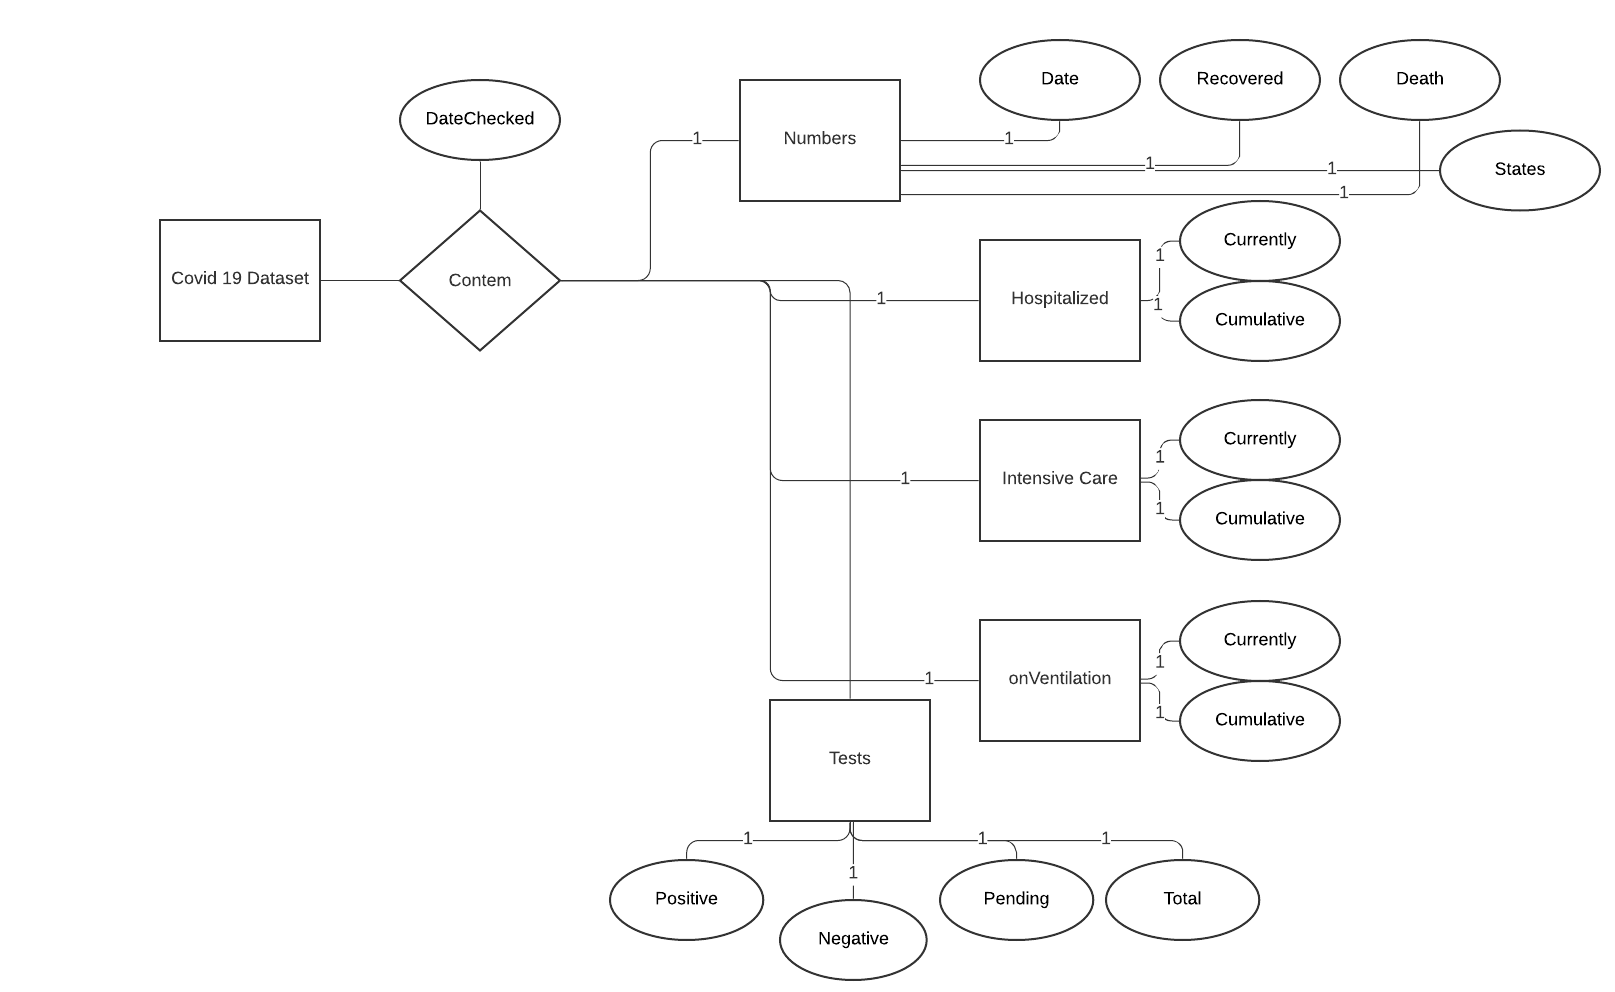